<center><img src="https://media.licdn.com/dms/image/D4D0BAQHOLNi1297n2g/company-logo_200_200/0/1697658047551?e=1707955200&v=beta&t=PaSbWR-y89ji3AKX9SAQs4dHjmhhgENXgMzasUTpgrE"></center>

This Project is the traditionnal machine learning project, the main objective is to practice `Python`, `Data Cleaning`, `Data Visualization` `Machine Learning`.

The main objectif is to train a machine learning model for titanic prediction based on a structured data.

# Set Up the envirement  
* Importing all necessary libraries : 

In [67]:
import pandas as pd
import math as mt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

* Importing DataSet from `CSV` file using Pandas : 

In [68]:
df = pd.read_csv("./train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the shape of the data frame : 

In [69]:
df.shape

(891, 12)

So we have $891$ of rows and $12$ colomns , till now we have $11$ features and $x_1, x_2, ..., x_{11}$ and two type of decisions $y = \{0, 1\}$ .

Actually we don't need all the data, just some of them are enagh to make a good decisions :

# Data Cleaning : 

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

For our case we only need age, Sex and Class

In [73]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'Cabin'], axis=1)

In [74]:
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


For the nullable values in age column, we attribute the mean of women to each null woman and mean for male 

In [75]:
meanMale = df.loc[df["Sex"] == 'male', "Age"].mean()
meanFemale = df.loc[df["Sex"] == 'female', "Age"].mean()

In [76]:
df.loc[df["Sex"] == 'male', "Age"] = df.loc[df["Sex"] == 'male', "Age"].fillna(meanMale)
df.loc[df["Sex"] == 'female', "Age"] = df.loc[df["Sex"] == 'female', "Age"].fillna(meanFemale)

In [77]:
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.000000
1,1,1,female,38.000000
2,1,3,female,26.000000
3,1,1,female,35.000000
4,0,3,male,35.000000
...,...,...,...,...
886,0,2,male,27.000000
887,1,1,female,19.000000
888,0,3,female,27.915709
889,1,1,male,26.000000


We need to affect man to 0 and female to 1 

In [78]:
df["Sex"] = df["Sex"].map({'male': 1, 'female': 0})

In [79]:
df

,Survived,Pclass,Sex,Age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,27.915709
889,1,1,1,26.000000


# Preparing our model 

In [80]:
sns.set()

In [81]:
df.dtypes.value_counts()

int64      3
float64    1
Name: count, dtype: int64

Convert all datatypes within pandas dataframe to Float32

Split dataset into Train/Test [80:20]

In [82]:
new_df = pd.get_dummies(df)
print(new_df.shape)
new_df.head()

(891, 4)


,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [83]:
target = "Survived"
predictors = list(set(new_df.columns) - set([target]))
print("new_df.shape:", new_df.shape)
predictors

new_df.shape: (891, 4)


['Age', 'Pclass', 'Sex']

In [84]:
new_df = new_df.astype(np.float32)

In [85]:
X_train, x_test, Y_train, y_test = train_test_split(new_df[predictors], new_df[target], test_size=0.2)

In [86]:
new_df.dtypes

Survived    float32
Pclass      float32
Sex         float32
Age         float32
dtype: object

Convert Pandas dataframe, first to numpy and then to Torch Tensors

In [87]:
X_train = torch.from_numpy(X_train.values)
x_test = torch.from_numpy(x_test.values)
Y_train = torch.from_numpy(Y_train.values).reshape(-1,1)
y_test = torch.from_numpy(y_test.values).reshape(-1,1)

In [88]:
print("X_train.shape:",X_train.shape)
print("x_test.shape:",x_test.shape)
print("Y_train.shape:",Y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: torch.Size([712, 3])
x_test.shape: torch.Size([179, 3])
Y_train.shape: torch.Size([712, 1])
y_test.shape: torch.Size([179, 1])


Starting training model and evaluating its performance :

* Using the classical method using sktlearn 

In [89]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)
clf

c:\Users\khaba\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [90]:
clf.score(x_test, y_test) * 100

59.77653631284916

Low score for the algorithme of SVC, so we try the KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

c:\Users\khaba\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [92]:
neigh.score(x_test, y_test) * 100

73.74301675977654

Let s try an other model : 

In [93]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, Y_train)
clf.score(x_test, y_test) * 100

c:\Users\khaba\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


77.6536312849162

In [100]:
def survived(model , pclass=3 , sex=0 , age=22):
    x = np.array([pclass,sex,age]).reshape(1,3)
    if clf.predict(x) == [0]:
        print('You will not servive')
        print(f'you will not survive with {clf.predict_proba(x)[0,0]*100}% and survive with {clf.predict_proba(x)[0,1]*100}%')
    else:
        print('You will survive')
        print(f'you will not survive with {clf.predict_proba(x)[0,0]*100}% and survive with {clf.predict_proba(x)[0,1]*100}%')

In [105]:
survived(clf, 3,1,26)

You will survive
you will not survive with 8.368130399240513% and survive with 91.63186960075949%


How to format the data for Torch dataset (Optional for this problem)

In [137]:
class Data(Dataset):
    def __init__(self, X, Y):
        self.x = X
        self.y = Y
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

dataset = Data(X_train, Y_train)

In [138]:
dataset.__getitem__(10)

(tensor([ 1., 54.,  1.]), tensor([0.]))

In [139]:
class LinearR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid() 

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [140]:
from TM import evaluate_model, train_network

In [141]:
num_epochs = 500
batch_size = 128
loss_function = nn.BCELoss()

In [142]:
weight_decay = 0.0
lambda_L1=0.00

In [143]:
model = LinearR(3, 1)

In [144]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [145]:
adam_loss = train_network(model, adam_optimizer, loss_function ,num_epochs,batch_size, X_train,Y_train,lambda_L1=0.0)

Epoch: 0 - Loss:4.8452
Epoch: 100 - Loss:0.6066


Epoch: 200 - Loss:0.5838
Epoch: 300 - Loss:0.5637
Epoch: 400 - Loss:0.5462



 Model Performance -
Training Accuracy- 0.788
Training Precision- 0.775
Training Recall- 0.601
Training ROCAUC 0.786
Validation Accuracy- 0.737
Validation Precision- 0.833
Validation Recall- 0.506
Validation ROCAUC 0.76




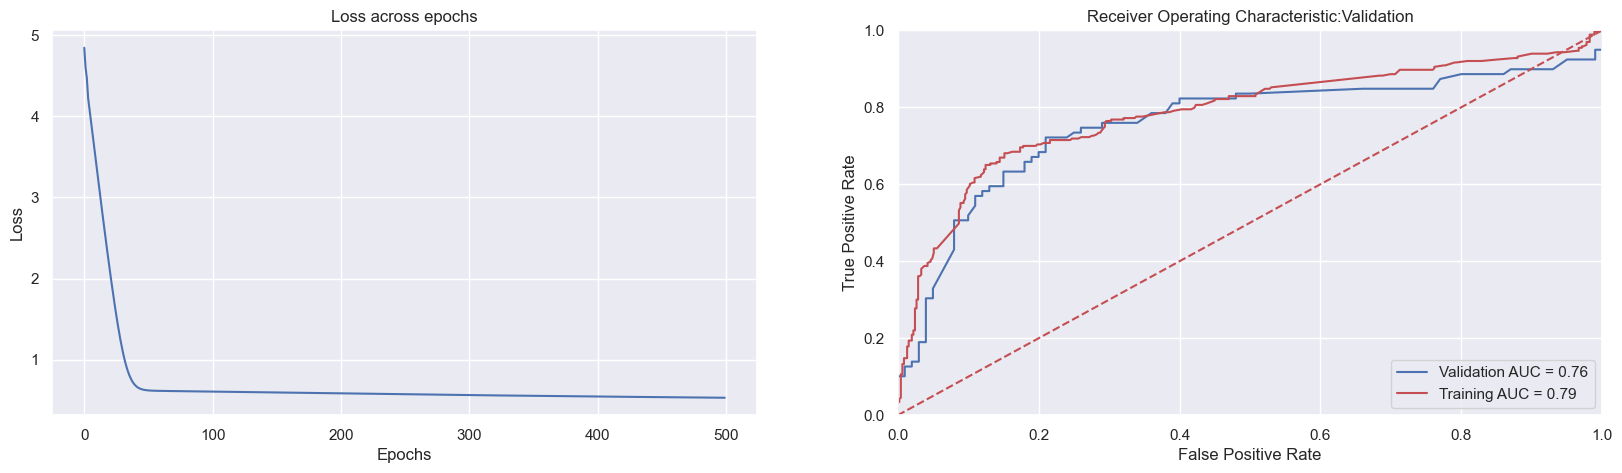

In [146]:
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)

In [147]:
with torch.no_grad():
    predictions = model(x_test)

threshold = 0.5
binary_predictions = (predictions >= threshold).float()

binary_predictions_np = binary_predictions.numpy()

print(binary_predictions_np)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [148]:
num_epochs = 500
batch_size= 128

weight_decay=0.0 

lambda_L1 = 0.0001 

model = LinearR(3, 1)

loss_function = nn.BCELoss()
 
adam_optimizer = torch.optim.Adam(model.parameters(),lr= 0.001 ,weight_decay=weight_decay)

In [150]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,Y_train=Y_train ,lambda_L1=lambda_L1)

Epoch: 0 - Loss:4.1491
Epoch: 100 - Loss:0.7824
Epoch: 200 - Loss:0.6197
Epoch: 300 - Loss:0.5654
Epoch: 400 - Loss:0.5384



 Model Performance -
Training Accuracy- 0.788
Training Precision- 0.789
Training Recall- 0.582
Training ROCAUC 0.803
Validation Accuracy- 0.732
Validation Precision- 0.83
Validation Recall- 0.494
Validation ROCAUC 0.776




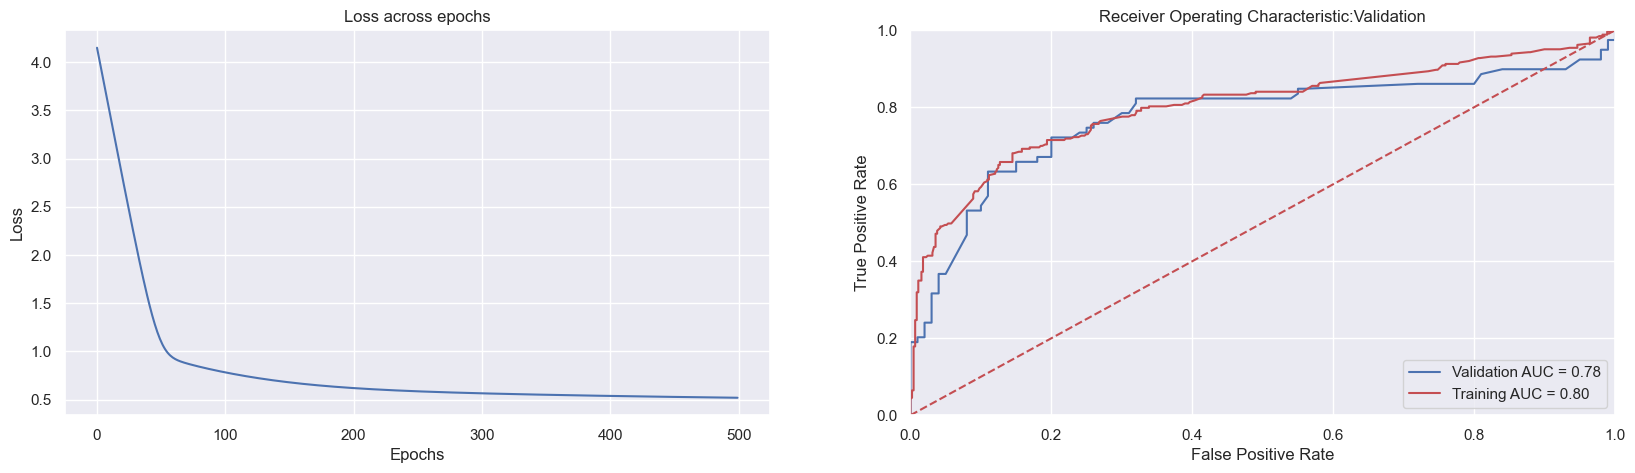

In [151]:
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)

In [152]:
with torch.no_grad():
    predictions = model(x_test)

threshold = 0.5
binary_predictions = (predictions >= threshold).float()

binary_predictions_np = binary_predictions.numpy()

print(binary_predictions_np)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [153]:
num_epochs = 500
batch_size= 128
lambda_L1 = 0.0001 #Enabled L1
weight_decay =0.001 #Enabled L2
model = LinearR(3, 1)
loss_function = nn.BCELoss()

In [154]:
adam_optimizer = torch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

In [155]:
adam_loss = train_network(model,adam_optimizer,loss_function ,num_epochs,batch_size,X_train,Y_train,lambda_L1=lambda_L1)

Epoch: 0 - Loss:0.8392
Epoch: 100 - Loss:0.5692
Epoch: 200 - Loss:0.5362
Epoch: 300 - Loss:0.5137
Epoch: 400 - Loss:0.4988



 Model Performance -
Training Accuracy- 0.792
Training Precision- 0.739
Training Recall- 0.677
Training ROCAUC 0.823
Validation Accuracy- 0.76
Validation Precision- 0.781
Validation Recall- 0.633
Validation ROCAUC 0.8




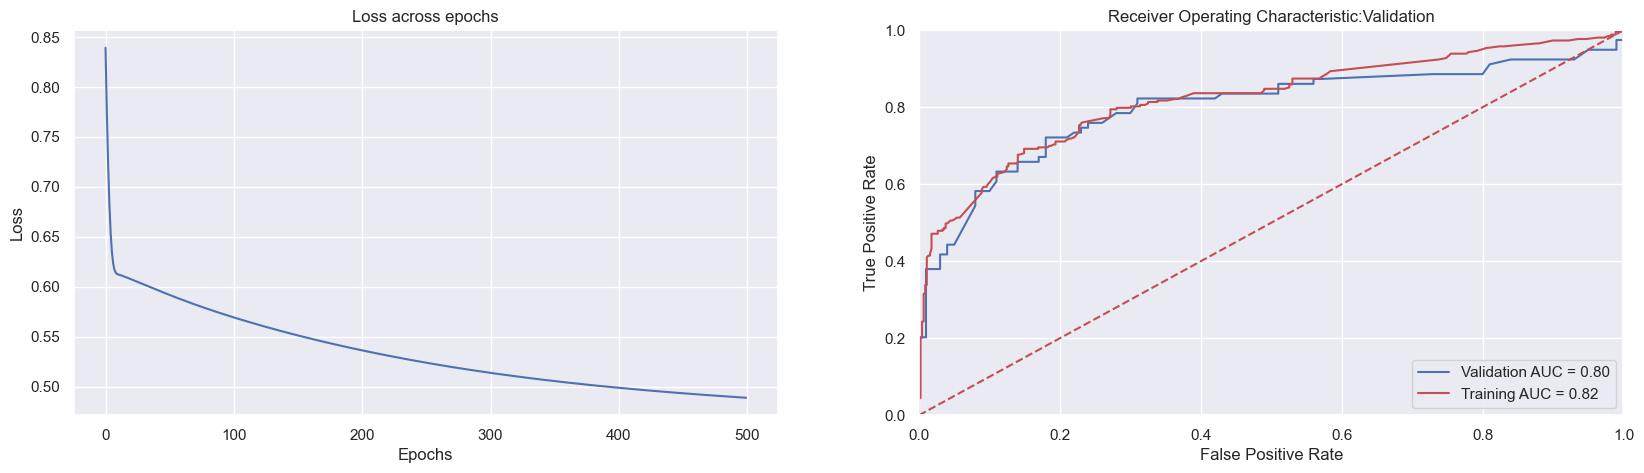

In [156]:
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)

In [157]:
with torch.no_grad():
    predictions = model(x_test)

threshold = 0.5
binary_predictions = (predictions >= threshold).float()

binary_predictions_np = binary_predictions.numpy()

print(binary_predictions_np)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.